In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg

# Eigenvalues/Eigenvectors

Vectors acted on by a transformation tend to rotate.  Here's an example.

In [2]:
A=np.zeros((2,2))
A[0,0]=1.
A[0,1]=2.
A[1,0]=2.
A[1,1]=5.
x0=np.array([1,0])
x1=A.dot(x0)

(-0.1, 2.5)

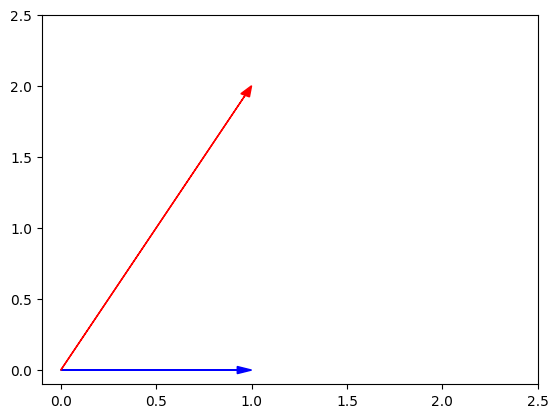

In [3]:
origin = np.array([0., 0.])
plt.arrow(origin[0], origin[1], x0[0], x0[1], head_width=0.05, color='blue',length_includes_head=True)
plt.arrow(origin[0], origin[1], x1[0], x1[1], head_width=0.05, color='red',length_includes_head=True)
plt.xlim((-0.1, 2.5))
plt.ylim((-0.1, 2.5))

However, transforming an eigenvector doesn't change its direction, only its length.

In [4]:
w,v=linalg.eig(A)
print(w)
print(v)

[0.17157288 5.82842712]
[[-0.92387953 -0.38268343]
 [ 0.38268343 -0.92387953]]


In [5]:
y0=v[:,0]
z0=v[:,1]
y1=A.dot(y0)
z1=A.dot(z0)

(-5.5, 1.0)

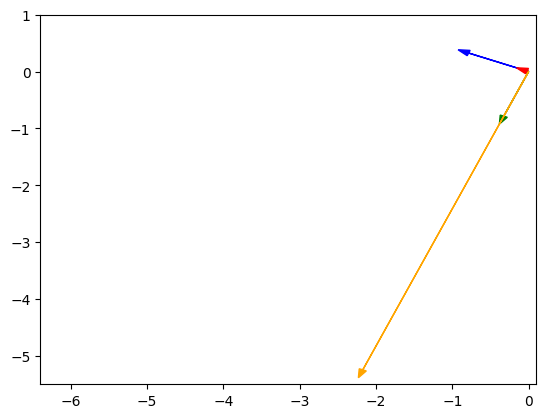

In [6]:
plt.arrow(origin[0], origin[1], y0[0], y0[1], head_width=0.1, color='blue',length_includes_head=True)
plt.arrow(origin[0], origin[1], y1[0], y1[1], head_width=0.1, color='red',length_includes_head=True)
plt.arrow(origin[0], origin[1], z0[0], z0[1], head_width=0.1, color='green',length_includes_head=True)
plt.arrow(origin[0], origin[1], z1[0], z1[1], head_width=0.1, color='orange',length_includes_head=True)
plt.xlim((-6.4,0.1))
plt.ylim((-5.5,1))

The matrix of right eigenvectors is given in the matrix $\mathbf{V}$.  The left eigenvectors are $\mathbf{V}^T$, with $\mathbf{V}$ being orthogonal.

In [7]:
np.dot(v,v.T)

array([[ 1.00000000e+00, -2.58605321e-17],
       [-2.58605321e-17,  1.00000000e+00]])

This symmetric matrix is positive-definite, which we know because all the eigenvaues are positive.  Many matrices in physics and statistics are positive-definite, including the moment of inertia, the Hamiltonian, and the covariance matrix.

Note that for nonsymmetric matrices, such as the rotation matrix, the eigenvalues and eigenvectors can be complex.

In [8]:
R=np.array([[1.,-1.],[1.,1.]])/np.sqrt(2.)# 45 deg rotation matrix
w,v=linalg.eig(R)
print(w)
print(v)

[0.70710678+0.70710678j 0.70710678-0.70710678j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        -0.70710678j 0.        +0.70710678j]]


It's more illuminating in exponential form.  The eigenvalues are $e^{\pm i\pi/4}$ and the eigenvectors are $(1,\mp i)/\sqrt{2}$ .

# QR Decomposition

Numpy's eigenvector codes use QR decomposition, where $\mathbf{Q}$ is an orthogonal matrix and $\mathbf{R}$ is an upper triangular matrix.  Numpy has a routine to do a QR decomposition of a matrix, *numpy.linalg.qr*. 

In [9]:
B=np.random.random((5,5))
B=(B+B.T)/2 # symmetrize matrix

Text(0.5, 1.0, 'B')

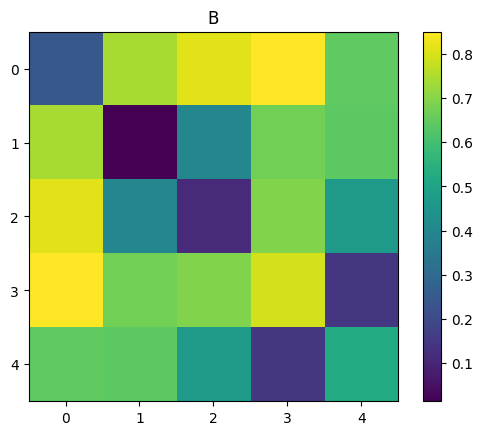

In [10]:
plt.imshow(B)
plt.colorbar()
plt.title('B')

In [11]:
Q,R=np.linalg.qr(B)
QQT=np.dot(Q,Q.T)
print(B-np.dot(Q,R))

[[ 2.22044605e-16  6.66133815e-16  5.55111512e-16  7.77156117e-16
   8.88178420e-16]
 [ 1.11022302e-16  3.33066907e-16  1.11022302e-16  2.22044605e-16
   3.33066907e-16]
 [ 0.00000000e+00  2.77555756e-16  4.16333634e-17  2.22044605e-16
   3.88578059e-16]
 [ 1.11022302e-16  2.22044605e-16  2.22044605e-16  2.22044605e-16
  -5.55111512e-17]
 [ 1.11022302e-16  2.22044605e-16  1.66533454e-16  2.77555756e-16
   0.00000000e+00]]


Text(0.5, 1.0, '$QQ^T$')

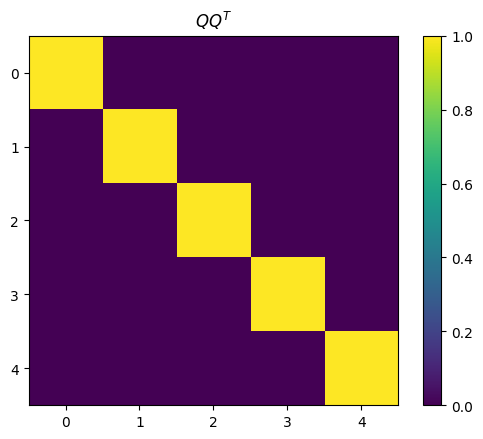

In [12]:
plt.imshow(QQT)
plt.colorbar()
plt.title('$QQ^T$')

Text(0.5, 1.0, 'R')

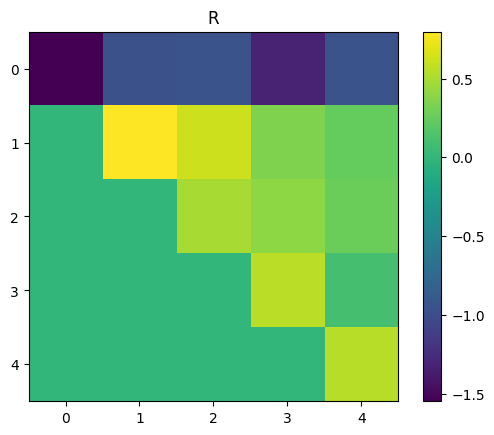

In [13]:
plt.imshow(R)
plt.colorbar()
plt.title('R')

Here we show that performing the similarity transformation $\mathbf{B}\to\mathbf{Q}^{\rm T}\mathbf{B}\mathbf{Q}$, where $\mathbf{Q}$ comes from successive QR decompositions of $\mathbf{B}$, reduces the off-diagonal entries while the determinants are unchanged.

/var/folders/6j/l6twl8zx6qb3jrn8jkx5yqx40000gn/T/ipykernel_74206/1312348176.py:16: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.semilogy(offd,label='B${}_i$[0,4]')


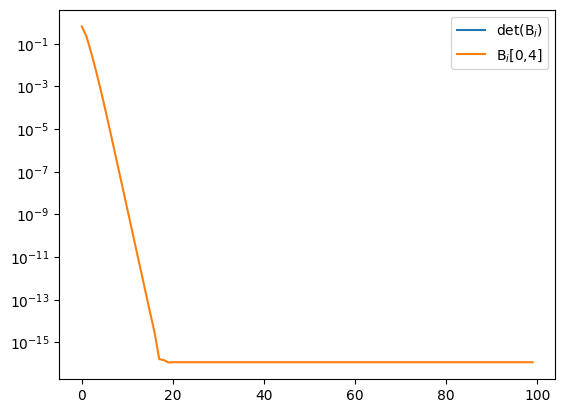

In [14]:
st=np.zeros((5,5))
st[:]=B[:]
ntrans = 100
detB=np.zeros(ntrans)
detB[0]=np.linalg.det(st)
offd=np.zeros(ntrans)
offd[0]=abs(st[0,-1])

for i in np.arange(1,ntrans):
    Q1,R1=np.linalg.qr(st)
    st=np.dot(Q1.T,np.dot(st,Q1))
    detB[i]=np.linalg.det(st)
    offd[i]=abs(st[0,-1])

plt.plot(np.round(detB,8),label='det(B${}_i$)')
plt.semilogy(offd,label='B${}_i$[0,4]')
plt.legend()

Now we show a code that computes the eigenvectors using QR decomposition. Note in my code I construct a tolerance test where I make a copy of my matrix, set its diagonal to zero, and find the largest off-diagonal element in matrix, such that I end the calculation when the largest off-diagonal element is less than the tolerance.

In [15]:
def qreigen(A,tol=1.e-10):
    n=len(A[:,0])
    testD=np.zeros((n,n))
    D=np.zeros((n,n))
    X=np.identity(n)
    D[:,:]=A[:,:] # initialize the diagonal matrix
    testD[:,:]=D[:,:] # create tolerance test matrix
    for i in np.arange(n):
        testD[i,i]=0.
    test=np.max(abs(testD)) # tolerance test
    while (test>=tol):
        Q,R=np.linalg.qr(D)
        D=np.dot(Q.T,np.dot(D,Q)) # compute next D
        X=np.dot(X,Q) # compute next vector matrix
        testD[:,:]=D[:,:]
        for i in np.arange(n):
            testD[i,i]=0.
        test=np.max(abs(testD)) # new tolerance test
    D=np.diag(D)
    ind=np.argsort(D) # sort eigenvalues in increasing order
    D=D[ind]
    X=X[:,ind]
    return D,X

In [16]:
D,X=qreigen(B)
print(D)
print(X)

[-0.75448603 -0.56882369 -0.30059208  0.50147697  2.81216611]
[[ 0.67153456  0.49565223  0.20577129 -0.02456979 -0.51031824]
 [-0.54047164  0.52117892 -0.50790596 -0.12318622 -0.40388071]
 [-0.4907558  -0.07310133  0.7636169   0.04276267 -0.41094467]
 [ 0.07589385 -0.4752497  -0.31089193  0.63540493 -0.51767232]
 [ 0.10163959 -0.50149309 -0.14115648 -0.76069272 -0.37362483]]


We show here that our result is consistent with numpy's subroutine.

In [17]:
Dt,Xt=np.linalg.eigh(B) # compute difference from numpy routine
print(Dt/D-1)
print(np.abs(Xt/X)-1.) # use abs because some vectors could point in opposite direction

[-9.99200722e-16 -1.42108547e-14  2.66453526e-15  3.55271368e-15
  2.22044605e-16]
[[-1.11022302e-16  4.59188243e-12 -2.66453526e-15 -1.87125793e-09
   0.00000000e+00]
 [-2.44249065e-15  2.19171348e-11  8.88178420e-16 -3.92449961e-10
  -1.11022302e-16]
 [-1.66533454e-15  5.42410561e-11  1.99840144e-15 -1.58563274e-10
   8.88178420e-16]
 [-1.66533454e-15  1.24013466e-10  2.22044605e-16 -6.93808344e-11
  -8.88178420e-16]
 [-6.66133815e-16 -1.40708667e-10 -9.99200722e-16  6.11533046e-11
   2.22044605e-16]]


# Spring Problem

In lecture we derived that the solution for the wave equation for a "springy" string $$-\rho(x)\frac{\partial^2u}{\partial t^2}+\frac{\partial}{\partial x}\left[p(x)\frac{\partial u}{\partial x}\right]-q(x)u(x,t)=0$$ can be written using separation of variables as $$u(x,t)=\sum_kw_k(x)v_k(t)\, .$$ In this case, $$v_k(t)=a_k\cos(\omega_kt)+b_k\sin(\omega_kt)$$ and the differential equation for $w(x)$ can be converted using the finite-difference method into the eigenvalue problem $\mathbf{M}\cdot\mathbf{w}=\omega^2\mathbf{w}$, where over the 1D grid $x_i=ih,\,\{i=1,N\}$, $\mathbf{w}=\{w(x_1),w(x_2),...,w(x_N)\}$.  Defining $Z_i=Z(x_i)$ for quantities $\rho(x)$, $q(x)$, and $p(x)$, the matrix $\mathbf{M}$ is given by $$\mathbf{M}=\frac{1}{h^2}\left(\begin{array}{cccccc}\frac{p_{1/2}+p_{3/2}+h^2q_1}{\rho_1}&\frac{-p_{3/2}}{\rho_1}&0&...&...&0\\\frac{-p_{3/2}}{\rho_2}&\frac{p_{3/2}+p_{5/2}+h^2q_2}{\rho_2}&\frac{-p_{5/2}}{\rho_2}&0&...&0\\0&\frac{-p_{5/2}}{\rho_3}&\frac{p_{5/2}+p_{7/2}+h^2q_3}{\rho_3}&\frac{-p_{7/2}}{\rho_3}&0&...\\...&...&...&...&...&...\\0&0&0&0&\frac{-p_{N-1/2}}{\rho_N}&\frac{p_{N-1/2}+p_{N+1/2}+h^2q_N}{\rho_N}\end{array}\right)\, .$$  In this section we will solve this to get the eigenvalues $\omega_k^2$ and the eigenvectors $\mathbf{w}_k$ for various physical cases.

First we start with the case where there is no springiness, $q=0$, and both $p$ and $\rho$ are constants such that $p/\rho=c^2$, where $c=1$ m/s. The string is 1 m long and we will use 200 subdivisions in the string, which means 199 points within the string.

In [18]:
from matplotlib import animation
from IPython.display import HTML

In [ ]:
N=200
h=1./(N+1)
c2=1.
M=np.zeros((N,N))
M[0,0]=2*c2
M[0,1]=-c2
M[-1,-2]=-c2
M[-1,-1]=2*c2
for i in np.arange(1,N-1):
    M[i,i-1]=-c2
    M[i,i]=2*c2
    M[i,i+1]=-c2
M/=h**2
om2,w=linalg.eig(M)
isort = np.argsort(om2)
om2=om2[isort]
w=w[:,isort]

In [50]:
M

array([[ 80802., -40401.,      0., ...,      0.,      0.,      0.],
       [-40401.,  80802., -40401., ...,      0.,      0.,      0.],
       [     0., -40401.,  80802., ...,      0.,      0.,      0.],
       ...,
       [     0.,      0.,      0., ...,  80802., -40401.,      0.],
       [     0.,      0.,      0., ..., -40401.,  80802., -40401.],
       [     0.,      0.,      0., ...,      0., -40401.,  80802.]],
      shape=(200, 200))

Here are the first 30 $\omega$ values.

In [37]:
om=np.sqrt(om2)
print(om[:30])

[ 3.12593102  6.25167113  9.37702944 12.50181507 15.62583718 18.74890499
 21.87082775 24.99141481 28.11047558 31.22781957 34.34325641 37.45659581
 40.56764765 43.67622193 46.78212879 49.88517855 52.9851817  56.08194891
 59.17529106 62.26501923 65.35094473 68.43287908 71.51063406 74.58402172
 77.65285434 80.71694452 83.77610511 86.83014928 89.87889053 92.92214265]


Here we plot the first 3 $\mathbf{w}$ vectors.

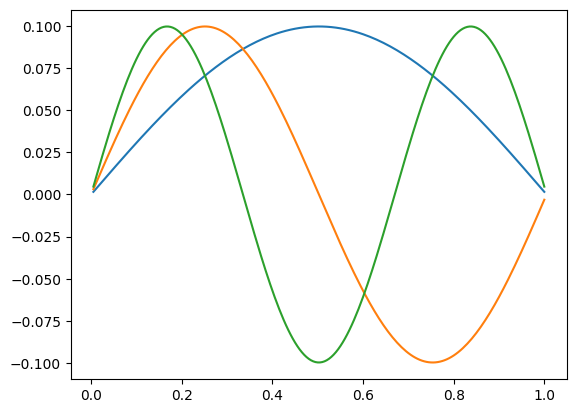

In [38]:
x=np.arange(1,N+1)*h
for i in np.arange(3):
    plt.plot(x,w[:,i])

At $t=0$, we can set the $a_k$ coefficients using $$u(x,t=0)=\sum_ka_kw_k(x)\,.$$  Although in this case, $\mathbf{M}$ is symmetric and the $\mathbf{w}$ vectors are thus orthogonal, in the general case $\mathbf{M}$ is not symmetric.  In that case you could multiply $u(x,t=0)$ by the inverse of the eigenvector matrix.

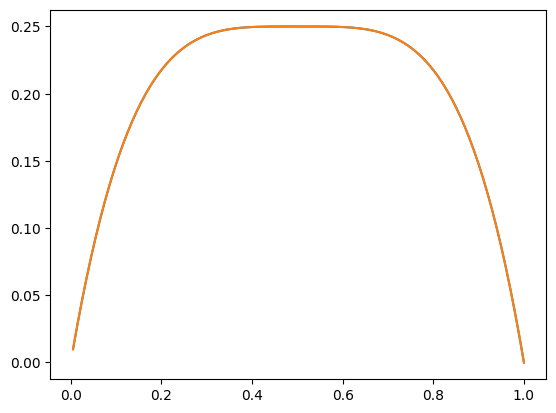

In [39]:
initial = (- (x - 0.5)**4 + 0.5**4) * 4.
winv=linalg.inv(w)
ak=winv.dot(initial)
plt.plot(x,initial)
plt.plot(x,w.dot(ak))

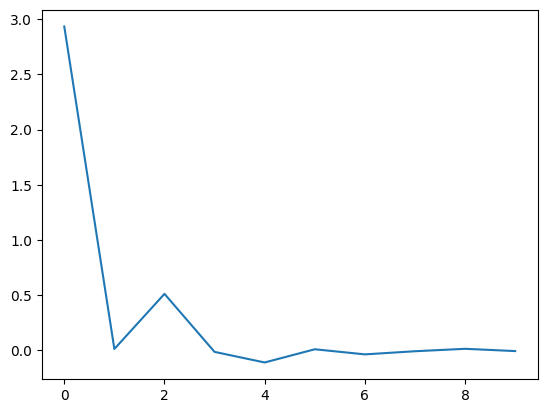

In [40]:
plt.plot(ak[:10])

We will assume that the spring starts at rest, which requires $b_k=0$.  Now we have enough to construct the motion of the string.  This code makes an animated line plot.  Note that to make it run on your computer you need to install *ffmpeg*, which can be done at the command line with *conda install ffmpeg*.

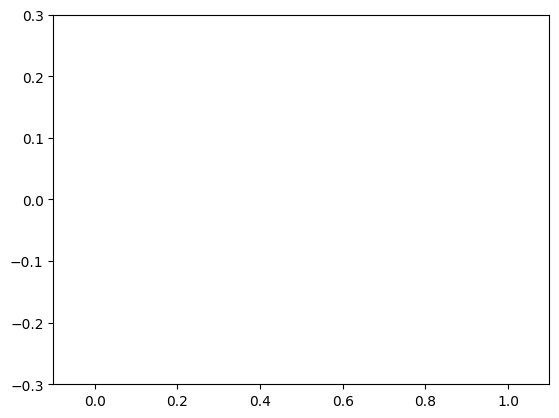

In [41]:
fig, ax = plt.subplots()

ax.set_xlim(( -0.1, 1.1))
ax.set_ylim((- 0.3, 0.3))

line, = ax.plot([], [], lw=2)

nframes = 500

def init():
    line.set_data([], [])
    return (line,)

In [42]:
def frame(i):
        period =  2. * np.pi / om[0]
        t = np.float64(i) / np.float64(nframes) * period * 4
        coeffs = ak * np.cos(om * t)
        y = w.dot(coeffs).flatten()
        line.set_data(x, y)
        return (line,)

In [43]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nframes, interval=40, blit=True,
                               repeat_delay=2000)

HTML(anim.to_html5_video())

For a springy string, vibrations are a bit different.

In [44]:
q=40.
M[0,0]=2*c2+h**2*q
M[0,1]=-c2
M[-1,-2]=-c2
M[-1,-1]=2*c2+h**2*q
for i in np.arange(1,N-1):
    M[i,i-1]=-c2
    M[i,i]=2*c2+h**2*q
    M[i,i+1]=-c2
M/=h**2
om2,w=linalg.eig(M)
isort = np.argsort(om2)
om2=om2[isort]
w=w[:,isort]

In [45]:
om=np.sqrt(om2)
print(om[:30])

[ 7.054888    8.89288434 11.31055618 14.01054532 16.85724733 19.78690067
 22.76693011 25.77927102 28.81317125 31.86183791 34.92075687 37.98679468
 41.05769156 44.13176137 47.20770672 50.28450098 53.3613107  56.43744319
 59.51231026 62.58540261 65.65627142 68.72451483 71.78976796 74.85169534
 77.90998516 80.96434482 84.01449748 87.06017933 90.10113741 93.13712791]


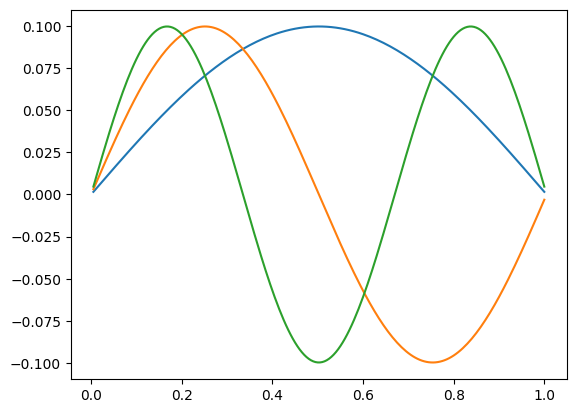

In [46]:
x=np.arange(1,N+1)*h
for i in np.arange(3):
    plt.plot(x,w[:,i])

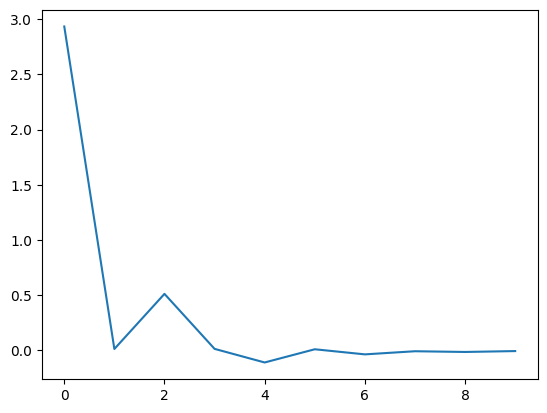

In [47]:
winv=linalg.inv(w)
ak=winv.dot(initial)
plt.plot(ak[:10])

In [48]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, frame, init_func=init,
                               frames=nframes, interval=40, blit=True,
                               repeat_delay=2000)

HTML(anim.to_html5_video())